In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
mba = msrp_band_analyzer.MSRPBand()

In [3]:
mba.update_company_data(['EMM'])


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2022-02-07
Latest download summary: 2022-03-04

[SUCCESS] All download summaries look good!
[SUCCESS] No unknown transfer packages!
96.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 0 (0.0%)
# transactions total: 120183
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 56973
### Adding new columns calculated by average price per unit ### 	
### Sorting time series ### 	
### Removing NAs from product category row ### 	
### Combining same product categories with different measurements ### 	


C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Available combined product category name in costs dataframe ### 	
['flower' 'topical' 'vape cartridge' 'extract' 'edible' 'pre-roll flower'
 'pre-roll infused' 'tincture' 'pre-roll leaf' 'other concentrate'
 'capsule' 'shake' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['edible' 'pre-roll flower' 'flower' 'extract' 'other concentrate'
 'vape cartridge' 'pre-roll infused' 'tincture' 'pre-roll leaf' 'topical'
 'capsule' 'shake' 'infused butter/oil' 'seeds']


In [4]:
top10_product_category_list = [
    'Other Concentrate (weight - each)',
    'Flower (packaged half ounce - each)',
    'Pre-Roll Infused',
    'Pre-Roll Flower',
    'Extract (weight - each)',
    'Flower',
    'Edible (weight - each)',
    'Vape Cartridge (weight - each)',
    'Vape Cartridge (volume - each)',
    'Flower (packaged eighth - each)'
]

# SALES Analysis

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.7970644543714105 %
Total number of transactions for Flower (packaged eighth - each) in tx_product_category_name : 27135


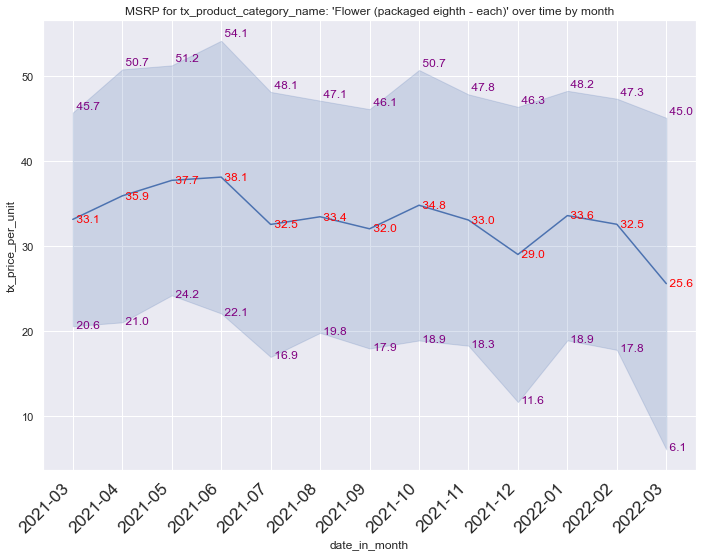

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.9853565074586013 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Vape Cartridge (volume - each) in tx_product_category_name : 7235


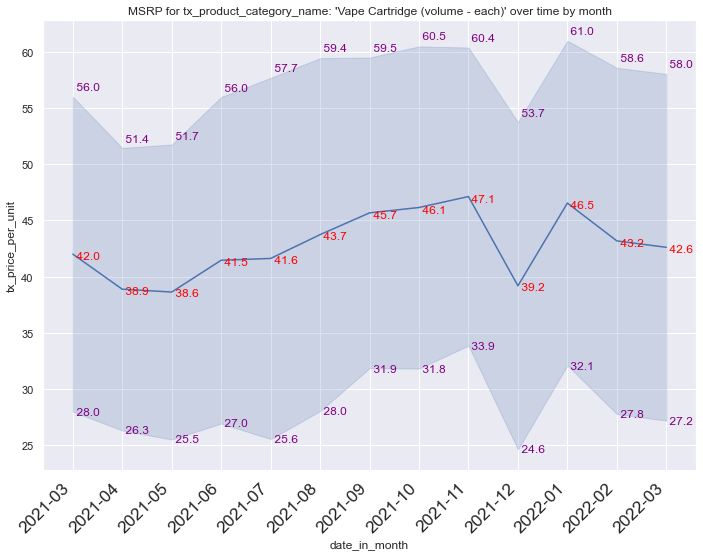

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.23295213892418468 %
Total number of transactions for Vape Cartridge (weight - each) in tx_product_category_name : 9422


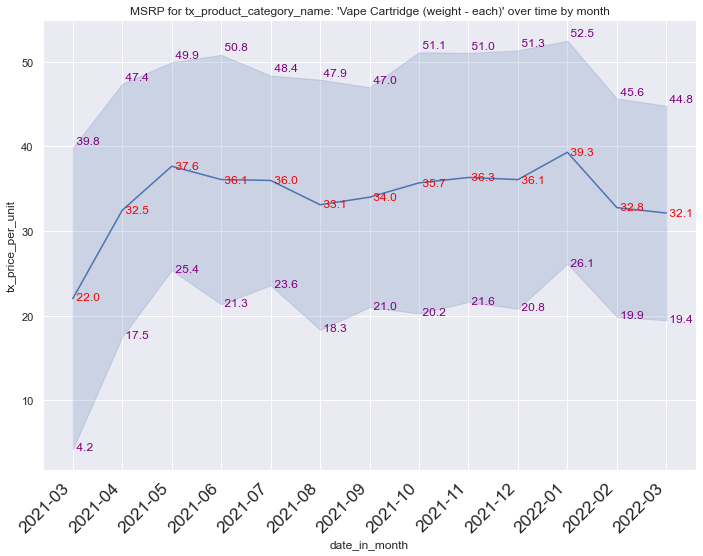

### RUN ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 12.597298775613245 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.5511844153658434 %
Total number of transactions for Edible (weight - each) in tx_product_category_name : 20642


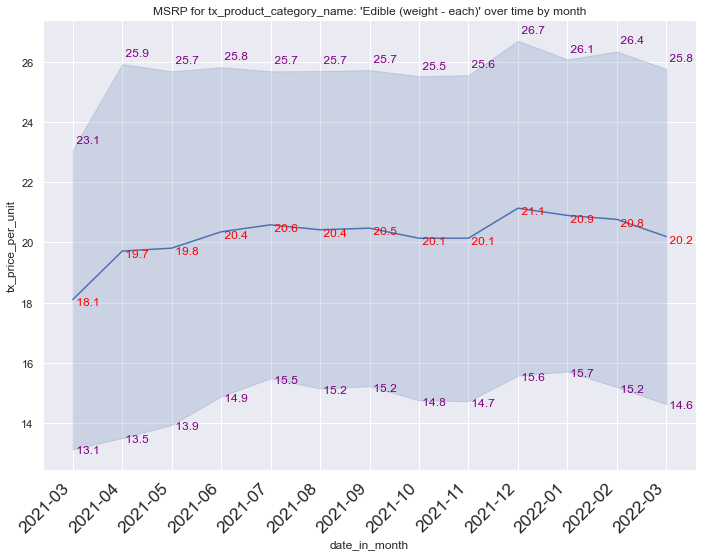

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower ###
### There are 0 rows with category name of Flower ###
### SKIPPING PRODUCT CATEGORY Flower ###
### RUN ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 4.269293924466338 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.936507936507936 %
Total number of transactions for Extract (weight - each) in tx_product_category_name : 3208


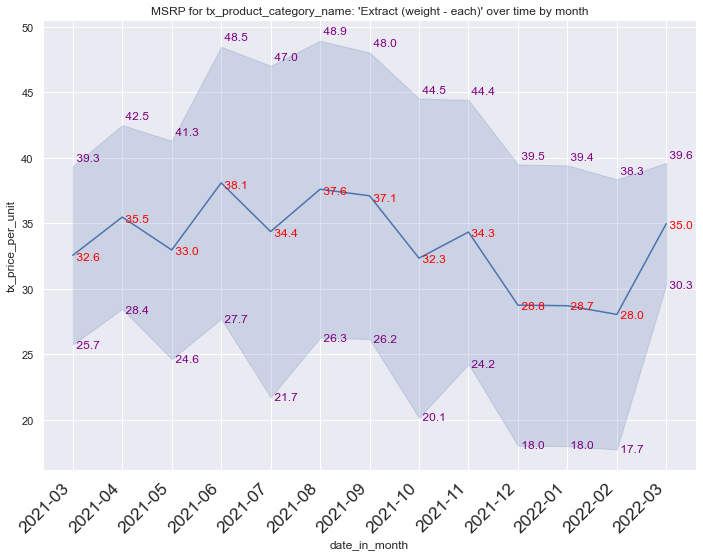

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.97647544366488 %
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 17644


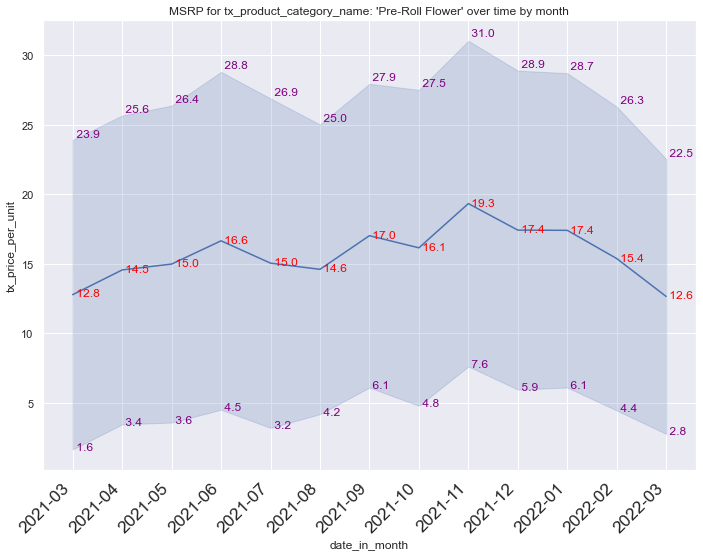

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.038154069767442 %
Total number of transactions for Pre-Roll Infused in tx_product_category_name : 9903


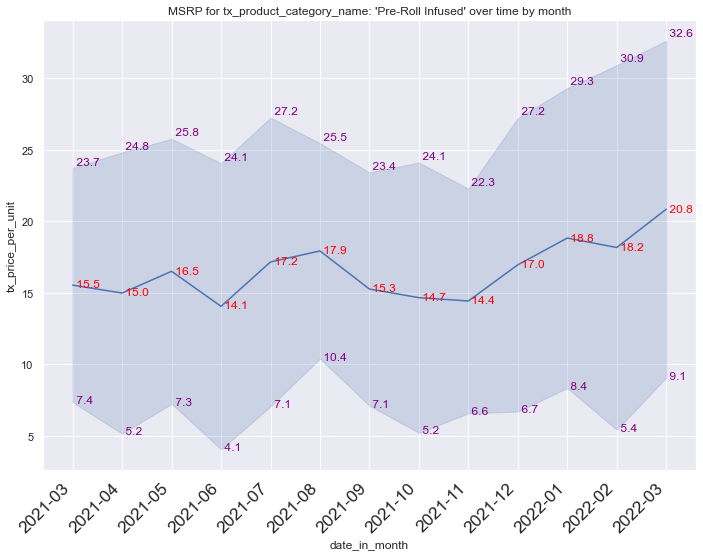

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 11.130434782608695 %
Number of transactions outliers above Boxplot Whisker Maximum is 9.043478260869566 %
Total number of transactions for Flower (packaged half ounce - each) in tx_product_category_name : 459


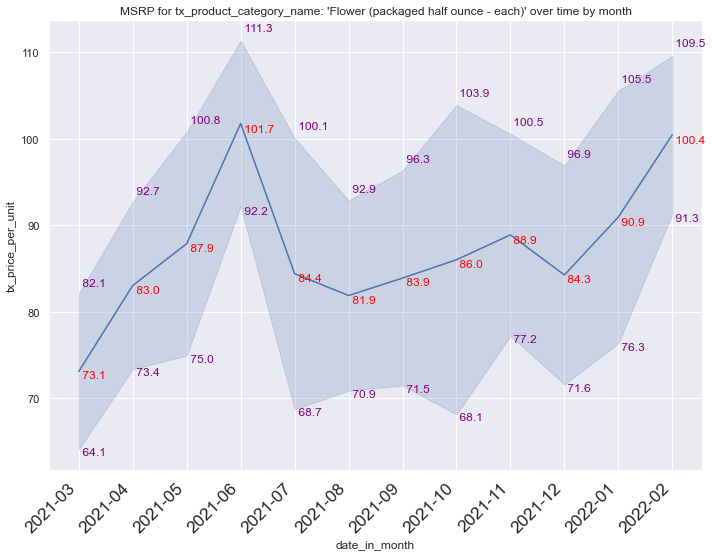

### RUN ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 6.67302192564347 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.816968541468065 %
Total number of transactions for Other Concentrate (weight - each) in tx_product_category_name : 897


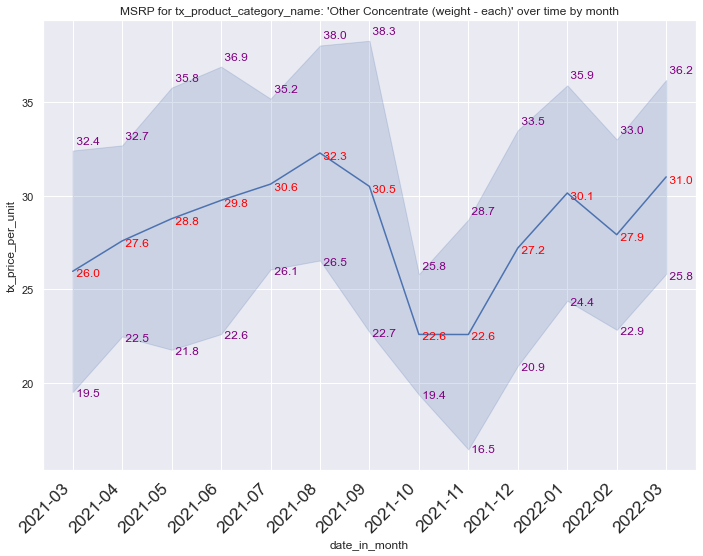

In [5]:
mba.run_time_series_plot_analysis_multi_category('tx_product_category_name', top10_product_category_list[::-1], 'S')

# COSTS Analysis

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Flower (packaged eighth - each) in product_category_name : 1009


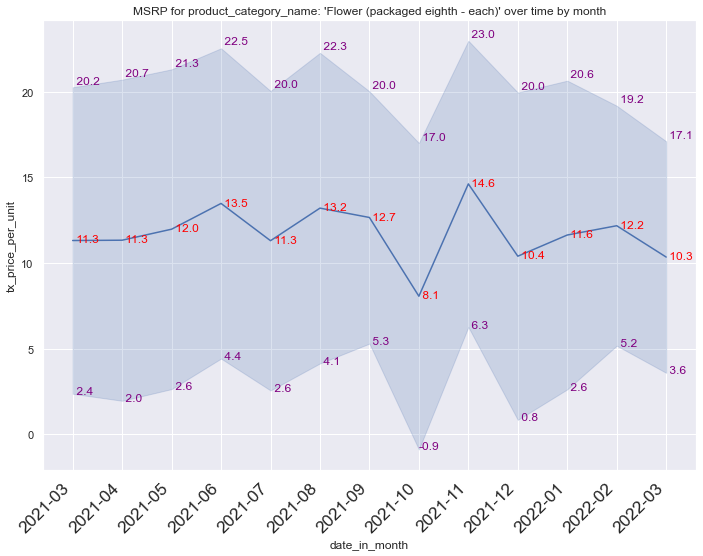

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Vape Cartridge (volume - each) in product_category_name : 532


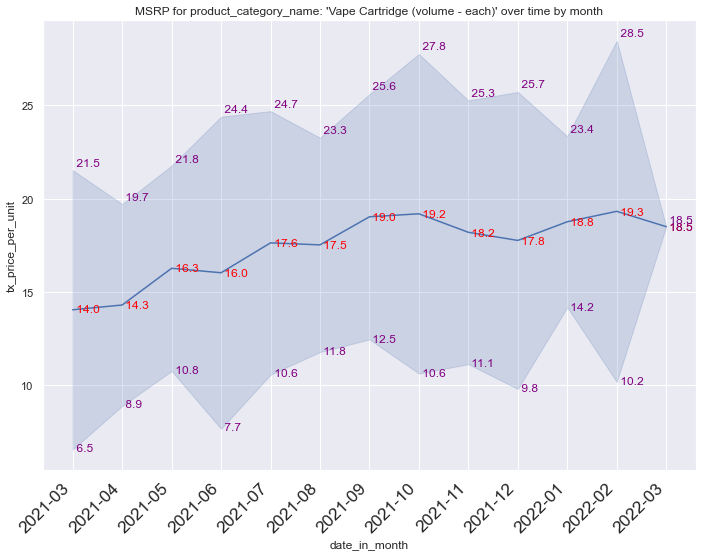

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 12.629757785467127 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.0380622837370241 %
Total number of transactions for Vape Cartridge (weight - each) in product_category_name : 499


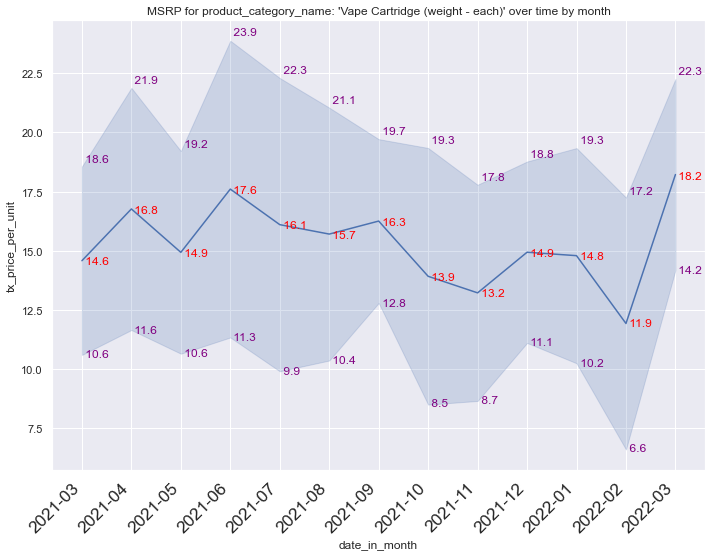

### RUN ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.5137180700094608 %
Total number of transactions for Edible (weight - each) in product_category_name : 1041


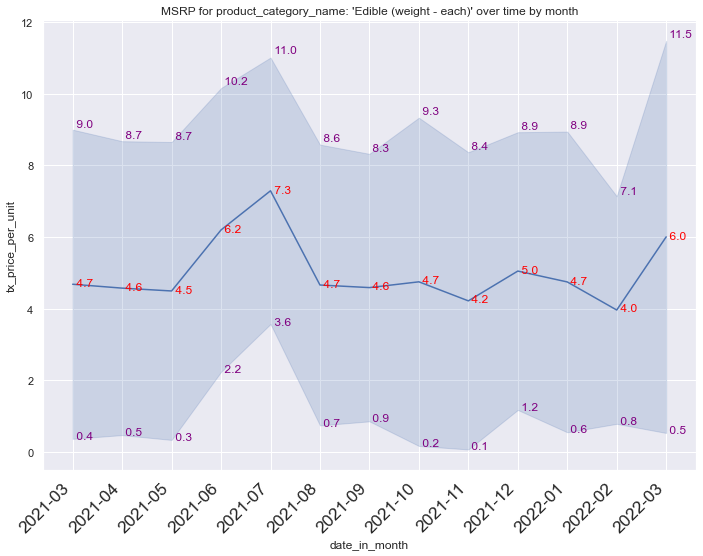

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower ###
### There are 0 rows with category name of Flower ###
### SKIPPING PRODUCT CATEGORY Flower ###
### RUN ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.588235294117647 %
Total number of transactions for Extract (weight - each) in product_category_name : 304


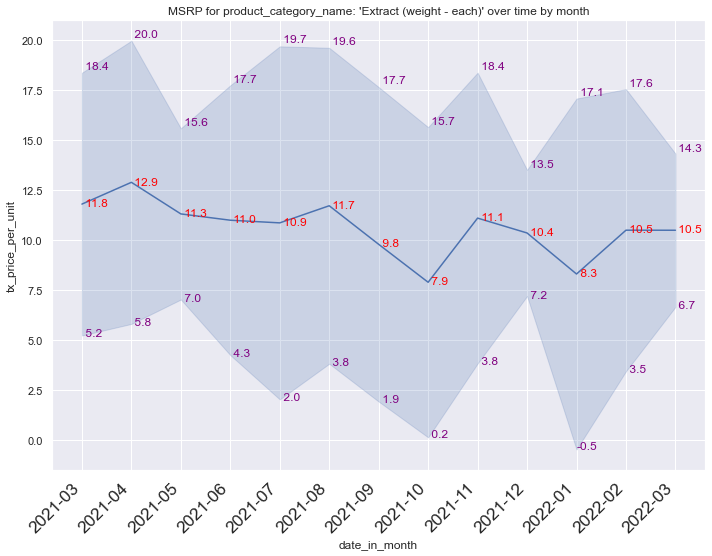

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.4081115335868186 %
Total number of transactions for Pre-Roll Flower in product_category_name : 770


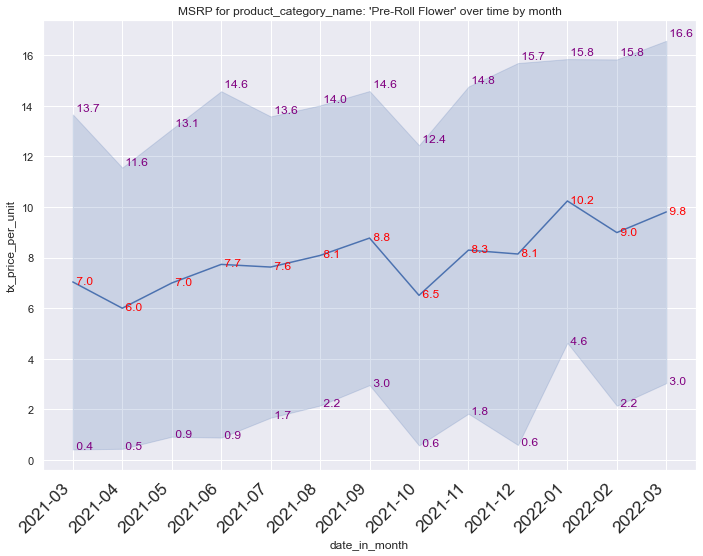

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.3232514177693762 %
Total number of transactions for Pre-Roll Infused in product_category_name : 522


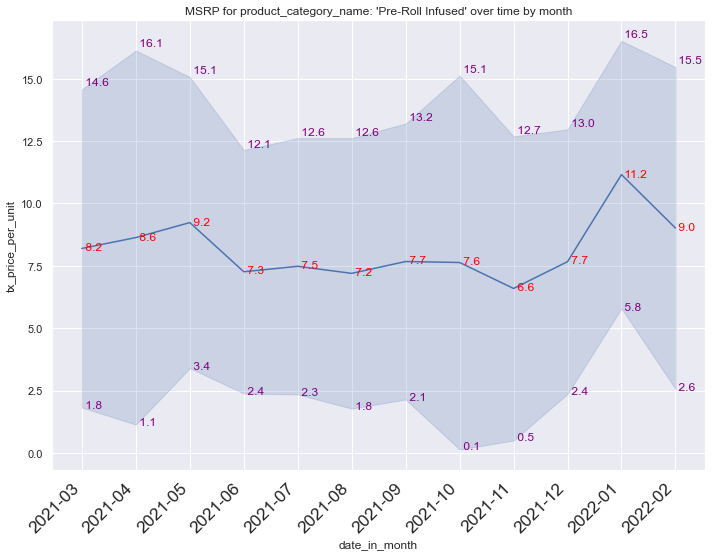

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Flower (packaged half ounce - each) in product_category_name : 49


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


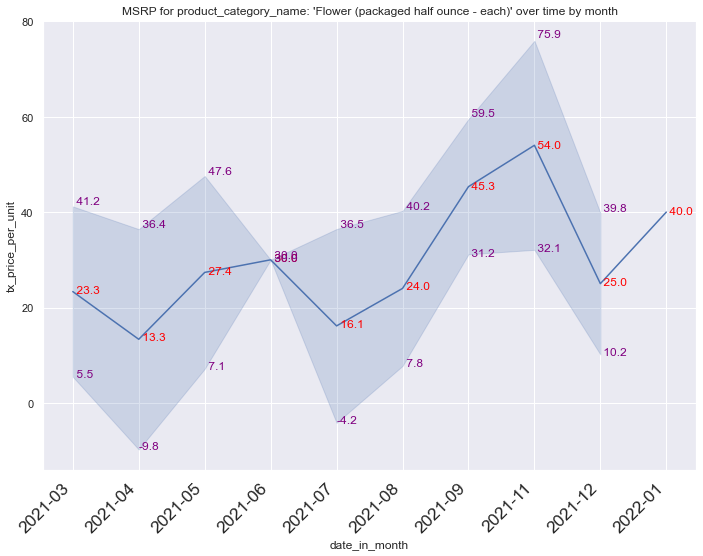

### RUN ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.1904761904761905 %
Total number of transactions for Other Concentrate (weight - each) in product_category_name : 83


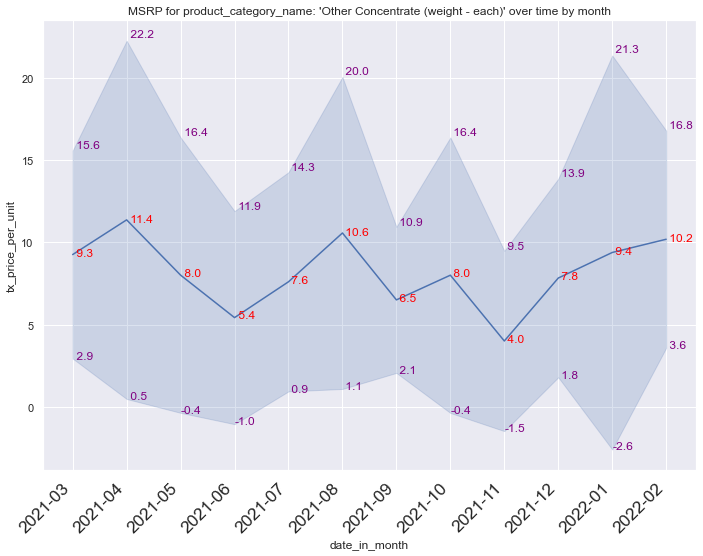

In [6]:
mba.run_time_series_plot_analysis_multi_category('product_category_name', top10_product_category_list[::-1], 'C')